In [1]:
# PLOTTING LIGHT AGAINST FLUX FOR KIC 006922244

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# read data in, n is unnecessary data
n,x,y = np.loadtxt("KIC006922244.tbl", unpack=True, skiprows=3)


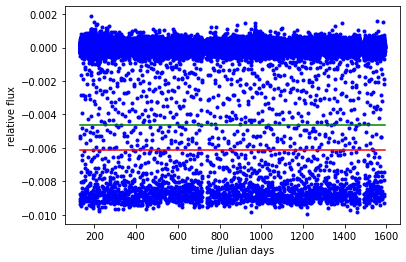

In [2]:
plt.plot(x,y,"b.",)
plt.xlabel('time /Julian days')
plt.ylabel('relative flux')
threshold1 = np.mean(y) - 3*np.std(y) 
threshold2 = np.mean(y) - 4*np.std(y) 
plt.plot([x[0],x[-1]],[threshold1, threshold1],'g')
plt.plot([x[0],x[-1]],[threshold2, threshold2],'r')
plt.show()

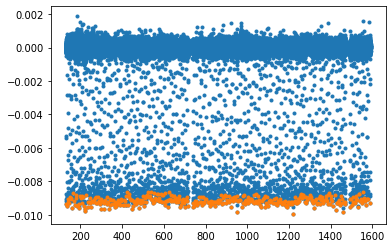

In [3]:
# once threshold2 is reached ymin is tracked
# the current value of y is stored as ymin until a lower value of y is reached
# once threshold1 is reached ymin is appended to the array yminima and the value of x at that point is appended to the array xminima
# xminima is plotted against yminima

threshold1 = np.mean(y) - 3*np.std(y) 
threshold2 = np.mean(y) - 4*np.std(y) 

xminima = []
yminima = []

i = 0
while i < len(y) :
    if y[i] < threshold2 :
        ymin = y[i]
        xmin = x[i]
        while y[i] < threshold1 and i < len(y) :
            if y[i] < ymin :
                ymin = y[i]
                xmin = x[i]
            i = i + 1
        xminima.append(xmin)
        yminima.append(ymin)
    i = i + 1

plt.plot(x,y,'.')
plt.plot(xminima,yminima,'.')


In [4]:
# good initial guess of the period - filter out outliers and compute mean of remainder
dx = np.diff(xminima)
mean = np.mean(dx)
dev = np.mean(np.abs(dx-mean))
filtered_dx = [val for val in dx if (val<mean+5*dev) and (val>mean-5*dev)]
period_guess = np.mean(filtered_dx)

In [5]:
# compute likely number of periods for each observation - round to the nearest integer multiple of initial guess
nperiods = dx/period_guess
nperiods_rounded = np.round(nperiods,decimals=1)
corrected_dx = dx / nperiods_rounded
period = np.mean(corrected_dx)
print(period)

3.5224732344298246


In [6]:
# open matplotlib graphs in a separate window (not inline)
%matplotlib qt

In [7]:
np.max(np.abs(nperiods - nperiods_rounded))

0.00939816955921069

In [14]:
# find how far into last period you are
x_modified_unadjusted = x % period
# find how far minimum is from start of period 
x_offset = x[np.argmin(y)] % period
x_modified = x_modified_unadjusted - x_offset

x_NASA = x%(3.5225)-x[np.argmin(y)]%(period)

plt.plot(x_modified,y,"b.")
plt.plot(x_NASA,y,"r.")
plt.xlabel('relative flux')
plt.ylabel('time /Julian days')
plt.show()

In [11]:
percentage_diff = ((period-3.5225)/3.5225)*100
print(percentage_diff)

-0.0007598458530968216
